In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

We start off by importing the necessary libraries :
- **numpy** for numerical operations
- **matplotlib** for plotting
- **pandas** for data manipulation
- **seaborn** for plotting
- **warnings** to ignore warnings

In [2]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
test_PassengerId = test_df['PassengerId']

Then we read both the datasets into pandas dataframes.

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's get some info about the trainig and testing data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


The training data has 891 rows and 12 columns. 

The testing data has 418 rows and 11 columns. 

The Survived column is the target variable and is not present in the test data.

There are alot of missing values in the training and testing data :
- **Age** has 177 missing values in the training data and 86 missing values in the testing data
- **Cabin** has 687 missing values in the training data and 327 missing values in the testing data
- **Embarked** has 2 missing values in the training data and 0 missing values in the testing data
- **Fare** has 0 missing values in the training data and 1 missing value in the testing data  
    
We will deal with these missing values later in the next section.   


# Cleaning

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Let's start by looking at the age column to see if we will fill the missing values with the mean or median.

In [8]:
mean_age = train_df['Age'].mean()
median_age = train_df['Age'].median()
print(f'Mean age   = {mean_age}')
print(f'Median age = {median_age}')

Mean age   = 29.69911764705882
Median age = 28.0


Let's plot the age distribution to see if it is skewed or not.

<Axes: xlabel='Age', ylabel='Count'>

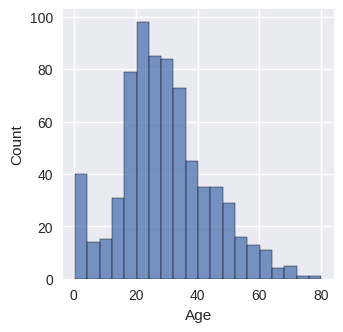

In [9]:
plt.figure(figsize=(3.5,3.5))
sns.histplot(x = 'Age', data = train_df)

It is a little skewed to the right so we will fill the missing values with the median.

Let's do the same for the fare column in the testing data.

In [10]:
mean_fare = test_df['Fare'].mean()
median_fare = test_df['Fare'].median()
print(f'Mean Fare = {mean_fare}')
print(f'Median Fare = {median_fare}')

Mean Fare = 35.627188489208635
Median Fare = 14.4542


<Figure size 400x400 with 0 Axes>

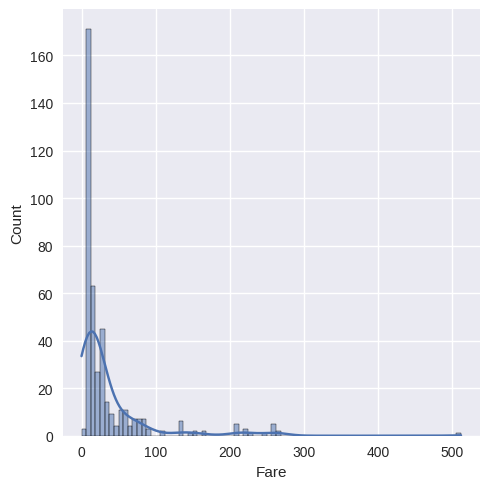

In [11]:
plt.figure(figsize=(4,4))
sns.displot(x = 'Fare', data = test_df, kde = True)

The fare column is also skewed to the right so we will fill the missing value with the median

And also it has some outliers so we will remove them using the **IQR** method befor filling the missing value.

In [12]:
Q1 = test_df['Fare'].quantile(0.25)
Q3 = test_df['Fare'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

test_df['Fare'] = test_df['Fare'].apply(lambda x: upper_bound if x > upper_bound else x)
test_df['Fare'] = test_df['Fare'].apply(lambda x: lower_bound if x < lower_bound else x)

Let's plot the fare column again to see if the outliers are removed.

<Figure size 400x400 with 0 Axes>

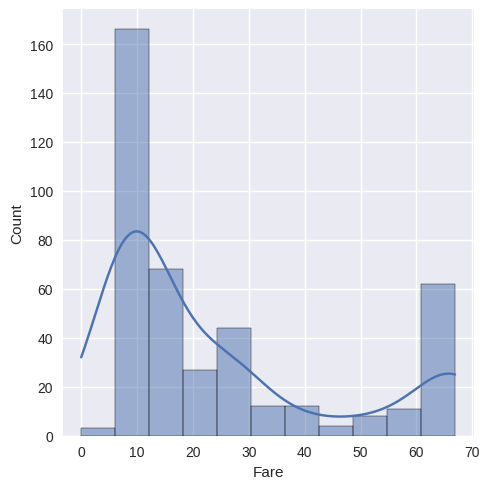

In [13]:
plt.figure(figsize=(4,4))
sns.displot(x = 'Fare', data = test_df, kde = True)

It looks much better now.

In [14]:
def clean (data):
    #dropping unwanted columns
    data.drop(columns=['Name','Cabin','Ticket','PassengerId'], inplace = True)
    
    #filling missing values in Age column
    data['Age'].fillna(train_df['Age'].median(), inplace = True)
    
    #filling missing values in Embarked column
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    
    #filling missing values in Fare column
    data['Fare'].fillna(train_df['Fare'].median(), inplace = True)
    
    #asserting that there is no missing values left
    for col in data:
        assert data[col].isnull().sum() == 0
    
    return data

Here i made a function to clean the data :
- drop the **PassengerId**, **Name**, **Cabin** and **Ticket** columns
- filled the missing values in the **Age** column with the median
- filled the missing values in the **Fare** column with the median
- filled the missing values in the **Embarked** column with the mode
- asserted that there are no missing values in the data

In [15]:
train_df = clean(train_df)
test_df  = clean(test_df)

In [16]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Everything looks good now.

## Encoding categorical columns

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

train_cat = train_df.loc[:,['Sex','Embarked']]
test_cat = test_df.loc[:,['Sex','Embarked']]

train_cat = ohe.fit_transform(train_cat)
train_cat = pd.DataFrame(train_cat)

test_cat = ohe.fit_transform(test_cat)
test_cat = pd.DataFrame(test_cat)

train_cat.columns = ['Female','Male','C','Q','S']
train_df = train_df.join(train_cat)

test_cat.columns = ['Female','Male','C','Q','S']
test_df = test_df.join(test_cat)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

I imported the **onehotencoder** from **sklearn.preprocessing** to encode the categorical columns.

Then i created an instance of the encoder and fitted it to the training data.

Then i transformed the training data and created a dataframe from it.

Then i did the same for the testing data.

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female,Male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0


Both the training and testing data are now encoded.

Let's drop the original categorical columns from the training and testing data.

In [ ]:
train_df.drop(columns=['Sex','Embarked'], inplace = True)
test_df.drop(columns=['Sex','Embarked'], inplace = True)

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
#deviding the trining set into train and validation 
X = train_df.drop('Survived', axis = 1)
Y = train_df['Survived']
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size= 0.2, random_state= 42)

I imported the **train_test_split** from **sklearn.model_selection** to split the training data into training and validation data.

Then i split the training data into training and validation data.

## Scaling numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Age','Fare']
for col in cols:
    x_train[col] = scaler.fit_transform(x_train[col].values.reshape(-1,1))
    x_val[col] = scaler.transform(x_val[col].values.reshape(-1,1))
    test_df[col] = scaler.transform(test_df[col].values.reshape(-1,1))

I scaled the numerical columns using the **StandardScaler** from **sklearn.preprocessing**.

Then i created an instance of the scaler and fitted it to the training data.

Then i transformed the training data and created a dataframe from it.

Then i did the same for the validation and testing data.    

## Modeling

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
#fitting the model
log_reg.fit(x_train,y_train)
#predicting the lables for validation data
y_val_pred_log = log_reg.predict(x_val)

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 1170, max_depth = 7, min_samples_split = 6, min_samples_leaf = 6
                             , random_state = 1, verbose = 1)
RFC.fit(x_train,y_train)
y_val_pred_rfc = RFC.predict(x_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    0.0s finished


## Evaluating the models on validation data

In [ ]:
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_val, y_val_pred_log)
random_acc = accuracy_score(y_val, y_val_pred_rfc)

print(f'Logistic regression accuracy = {logistic_acc}')
print(f'Random forests classifier accuracy = {random_acc}')

Logistic regression accuracy = 0.8100558659217877
Random forests classifier accuracy = 0.8044692737430168


 Looks like Logistic regression classifier has higher accuracy so i am going with it

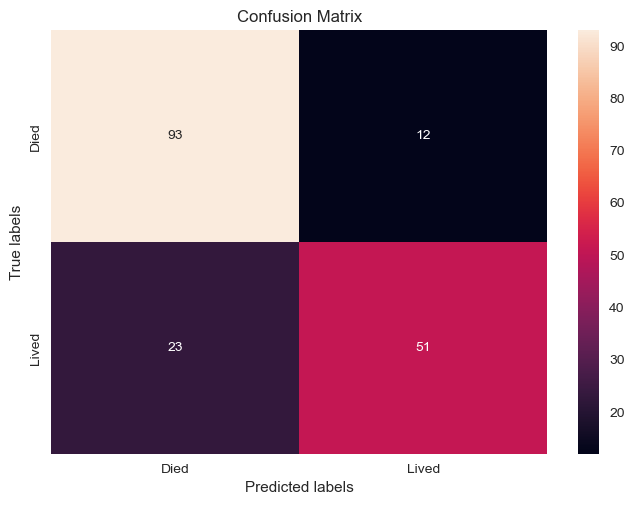

In [ ]:
from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_val,y_val_pred_rfc)

ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Died', 'Lived']); ax.yaxis.set_ticklabels(['Died', 'Lived']);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_val_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
#fitting the model
RFC.fit(X,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    1.4s finished


RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=1170, random_state=1, verbose=1)

We fitted all the train data again on the model

In [ ]:
final = RFC.predict(test_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1170 out of 1170 | elapsed:    0.0s finished


In [ ]:
df = pd.DataFrame({'PassengerId':test_PassengerId.values, 'Survived': final})

In [ ]:
df['Survived'].value_counts()

Survived
0    234
1    184
Name: count, dtype: int64

In [ ]:
df.to_csv('Final.csv',index=False)

I predicted the target variable for the testing data using the RF classifier.

Then i created a dataframe from the predictions.

Then i saved the dataframe to a csv file.

In [ ]:
import cv2

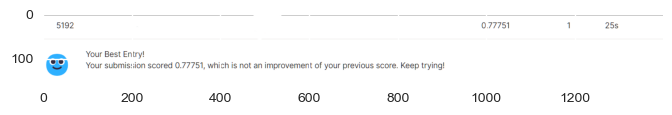

In [ ]:
img = cv2.imread('1.png')
plt.imshow(img)
plt.show()

And like the image shows i got a 77.75 accuraacy on kaggle!